In [1]:
from src.experiments import StockMixer_Table2
from src.utils import set_seed
import numpy as np

In [2]:
# global params
epochs = 100
seed = 1

# Window length

In [3]:
IC_lst = []
seq_lengths = [8, 16, 32, 64]
for seq_len in seq_lengths:
    set_seed(seed)
    test_performance = StockMixer_Table2(seq_len=seq_len, 
                                         hidden_dim=64, 
                                         market_dim=20, 
                                         scale_factors=[1,2,4], 
                                         alpha=0.1, 
                                         epochs=epochs, 
                                         seed=seed, 
                                         load_weights=True, 
                                         )
    IC_lst.append(test_performance["IC"])

In [4]:
for seq_len, IC in zip(seq_lengths, IC_lst):
    print(f"seq_len={seq_len}, IC={IC:.4f}")

seq_len=8, IC=0.0347
seq_len=16, IC=0.0237
seq_len=32, IC=0.0271
seq_len=64, IC=0.0217


# Market dim

In [6]:
IC_lst = []
market_dims = [10, 20, 30, 40]
for market_dim in market_dims:
    set_seed(seed)
    test_performance = StockMixer_Table2(seq_len=16, 
                                         hidden_dim=64, 
                                         market_dim=market_dim, 
                                         scale_factors=[1,2,4], 
                                         alpha=0.1, 
                                         epochs=epochs, 
                                         seed=seed, 
                                         load_weights=True, 
                                         )
    IC_lst.append(test_performance["IC"])

In [7]:
for market_dim, IC in zip(market_dims, IC_lst):
    print(f"market_dim={market_dim}, IC={IC:.4f}")

market_dim=10, IC=0.0236
market_dim=20, IC=0.0237
market_dim=30, IC=0.0264
market_dim=40, IC=0.0326


# Scale factor

In [9]:
IC_lst = []
scale_factors_lst = [[1], [1,2], [1,2,4], [1,2,4,8]]
for scale_factors in scale_factors_lst:
    set_seed(seed)
    test_performance = StockMixer_Table2(seq_len=16, 
                                         hidden_dim=64, 
                                         market_dim=20, 
                                         scale_factors=scale_factors, 
                                         alpha=0.1, 
                                         epochs=epochs, 
                                         seed=seed, 
                                         load_weights=True, 
                                         )
    IC_lst.append(test_performance["IC"])

In [10]:
for scale_factors, IC in zip(scale_factors_lst, IC_lst):
    print(f"scale_factors={scale_factors}, IC={IC:.4f}")

scale_factors=[1], IC=0.0007
scale_factors=[1, 2], IC=0.0247
scale_factors=[1, 2, 4], IC=0.0237
scale_factors=[1, 2, 4, 8], IC=0.0303


# Replicate Figure 4 in the paper with my experiments results

seq_len=8, IC=0.0347
seq_len=16, IC=0.0237
seq_len=32, IC=0.0271
seq_len=64, IC=0.0217

market_dim=10, IC=0.0236
market_dim=20, IC=0.0237
market_dim=30, IC=0.0264
market_dim=40, IC=0.0326

scale_factors=1, IC=0.0007
scale_factors=2, IC=0.0247
scale_factors=3, IC=0.0237
scale_factors=$, IC=0.0303

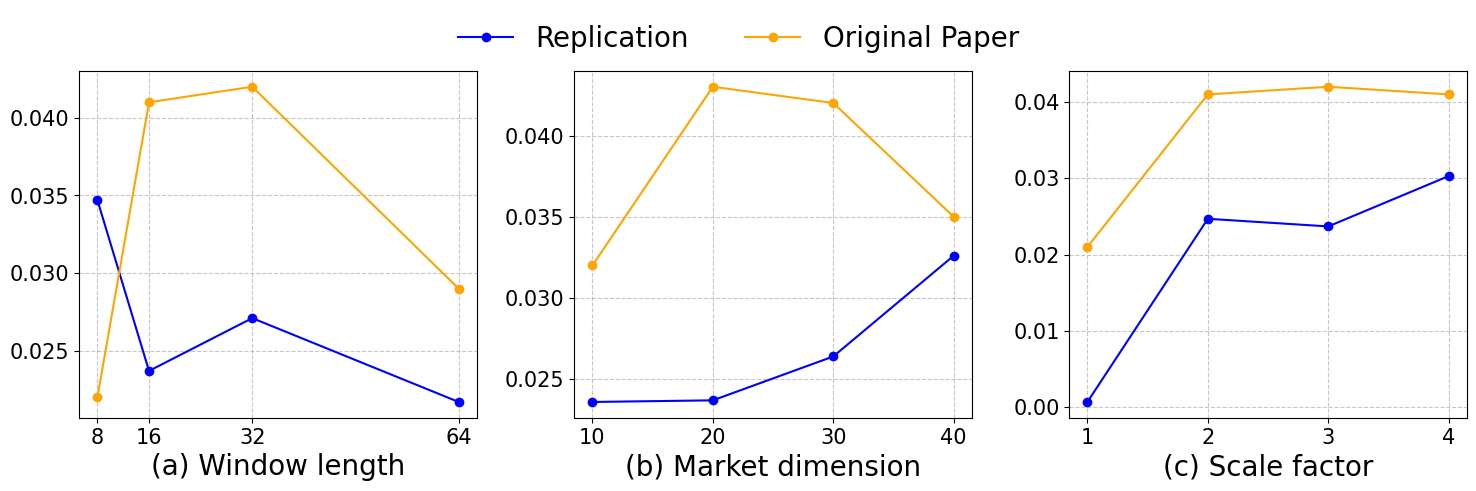

In [27]:
import matplotlib.pyplot as plt

# Data for replication results
seq_len = [8, 16, 32, 64]
replication_seq_len_ic = [0.0347, 0.0237, 0.0271, 0.0217]
original_seq_len_ic = [0.022, 0.041, 0.042, 0.029]

market_dim = [10, 20, 30, 40]
replication_market_dim_ic = [0.0236, 0.0237, 0.0264, 0.0326]
original_market_dim_ic = [0.032, 0.043, 0.042, 0.035]

scale_factors = [1, 2, 3, 4]
replication_scale_factors_ic = [0.0007, 0.0247, 0.0237, 0.0303]
original_scale_factors_ic = [0.021, 0.041, 0.042, 0.041]

# Create the subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Subplot (a) Window length
axes[0].plot(seq_len, replication_seq_len_ic, marker='o', label="Replication", color='blue')
axes[0].plot(seq_len, original_seq_len_ic, marker='o', label="Original Paper", color='orange')
axes[0].set_xlabel("(a) Window length", fontsize=20)
axes[0].set_xticks(seq_len)
axes[0].tick_params(axis='x', labelsize=15)
axes[0].tick_params(axis='y', labelsize=15)
axes[0].grid(linestyle='--', alpha=0.7)

# Subplot (b) Market dimension
axes[1].plot(market_dim, replication_market_dim_ic, marker='o', label="Replication", color='blue')
axes[1].plot(market_dim, original_market_dim_ic, marker='o', label="Original Paper", color='orange')
axes[1].set_xlabel("(b) Market dimension", fontsize=20)
axes[1].set_xticks(market_dim)
axes[1].tick_params(axis='x', labelsize=15)
axes[1].tick_params(axis='y', labelsize=15)
axes[1].grid(linestyle='--', alpha=0.7)

# Subplot (c) Scale factor
axes[2].plot(scale_factors, replication_scale_factors_ic, marker='o', label="Replication", color='blue')
axes[2].plot(scale_factors, original_scale_factors_ic, marker='o', label="Original Paper", color='orange')
axes[2].set_xlabel("(c) Scale factor", fontsize=20)
axes[2].set_xticks(scale_factors)
axes[2].tick_params(axis='x', labelsize=15)
axes[2].tick_params(axis='y', labelsize=15)
axes[2].grid(linestyle='--', alpha=0.7)

# Add a legend
fig.legend(["Replication", "Original Paper"], loc='upper center', ncol=2, fontsize=20, frameon=False)

# Adjust layout and show the figure
plt.tight_layout(rect=[0, 0, 1, 0.88])
plt.show()